# INFOMCDMMC Critical Data Mining of Media Culture

## Utrecht University, MSc Applied Data Science


### Team members:
* Meagan Loerakker, m.b.loerakker@students.uu.nl
* Celesta Terwisscha van Scheltinga, c.c.m.terwisschavanscheltinga@students.uu.nl
* Nina Alblas, n.m.alblas@students.uu.nl
* Berber van Drunen, b.p.vandrunen@students.uu.nl
* Debarupa Roy Choudhury, d.roychoudhury@students.uu.nl

In [1]:
import pandas as pd

#NLP
import spacy
from spacy.symbols import nsubj, VERB
nlp = spacy.load("en_core_web_sm")

import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
lemmatizer = nltk.stem.WordNetLemmatizer()

#support
import re
import string

#KMeans
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import confusion_matrix

#LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim import corpora, models
from gensim.models import Phrases
from gensim.corpora import Dictionary

#Visualisation
import matplotlib.pyplot as plt

C:\Users\celes\anaconda3\envs\ADS\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading and Exploring the data

In [2]:
#load data
newsdata = pd.read_csv('data/AI_news.csv')

# Dropping cols we're not using
news_df = newsdata[['outlet', 'title', 'description', 'datetime', 'body']].copy()

In [3]:
#Convert the respective columns into strings
news_df['title'] = news_df['title'].astype(str)
news_df['description'] = news_df['description'].astype(str)
news_df['body'] = news_df['body'].astype(str)
news_df['outlet'] = news_df['outlet'].astype(str)
news_df['datetime'] = news_df['datetime'].astype('datetime64[ns]')

# Plots - News articles mentioning AI

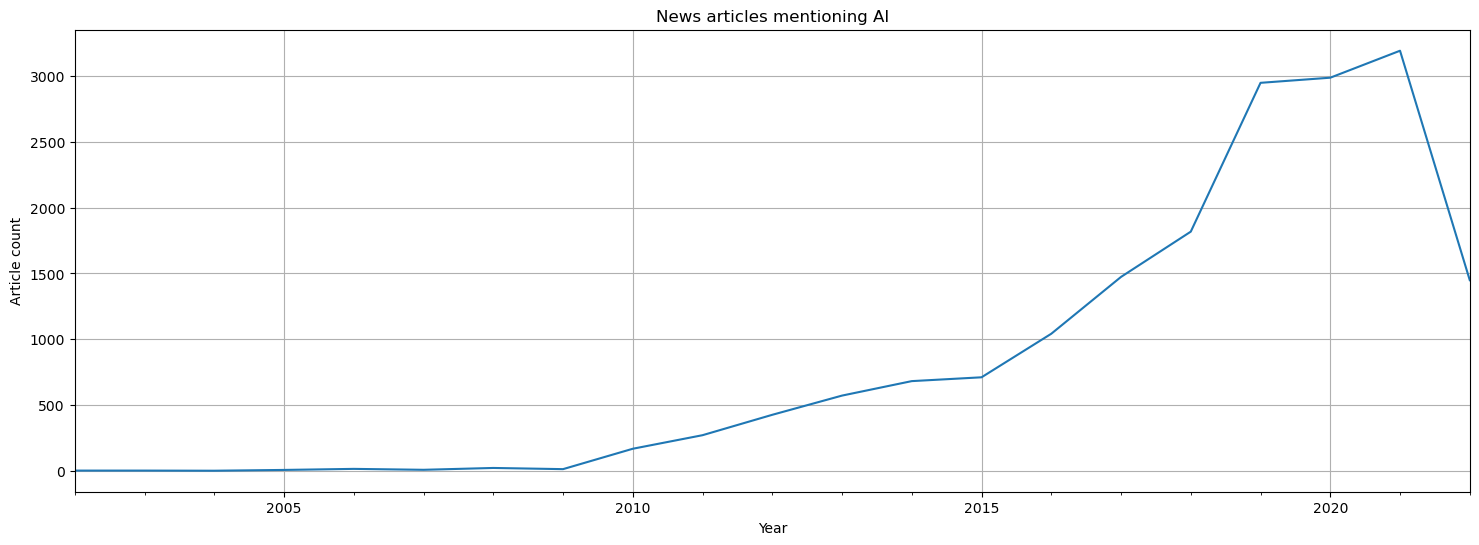

In [4]:
# All articles that mention AI
# See the news articles about AI over the years
# Create a graph over the years
articlesAll = news_df.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesAll.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('News articles mentioning AI')
plt.grid(True)

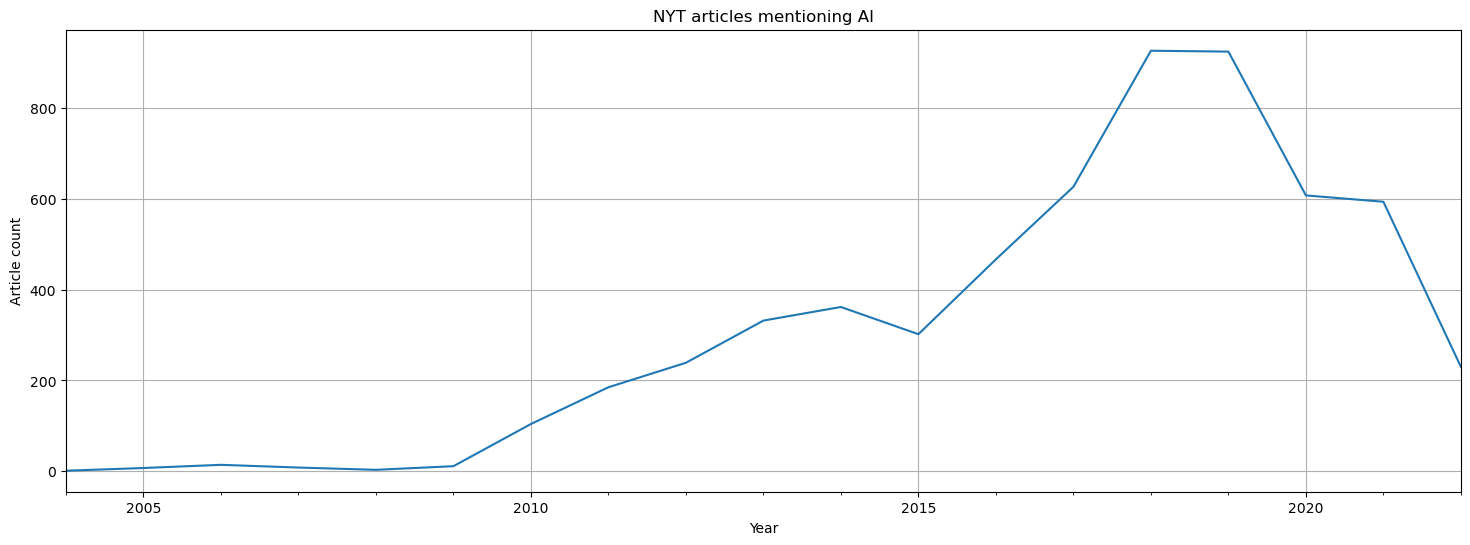

In [5]:
# Per outlet - NYT
df_nyt = news_df.loc[news_df['outlet'] == 'NYT']
df_nyt.shape

# Create a graph over the years
articlesNyt = df_nyt.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesNyt.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('NYT articles mentioning AI')
plt.grid(True)

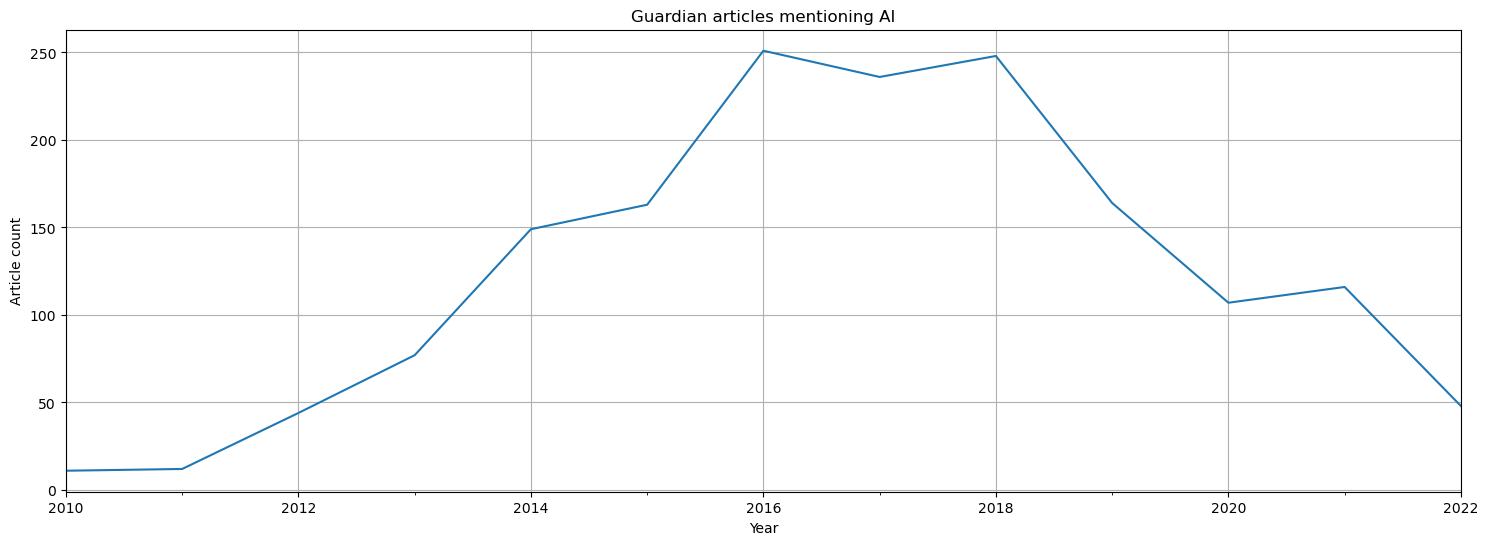

In [6]:
# Per outlet - Guardian
df_guard = news_df.loc[news_df['outlet'] == 'Guardian']
df_guard.shape

# Create a graph over the years
articlesGuard = df_guard.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesGuard.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('Guardian articles mentioning AI')
plt.grid(True)

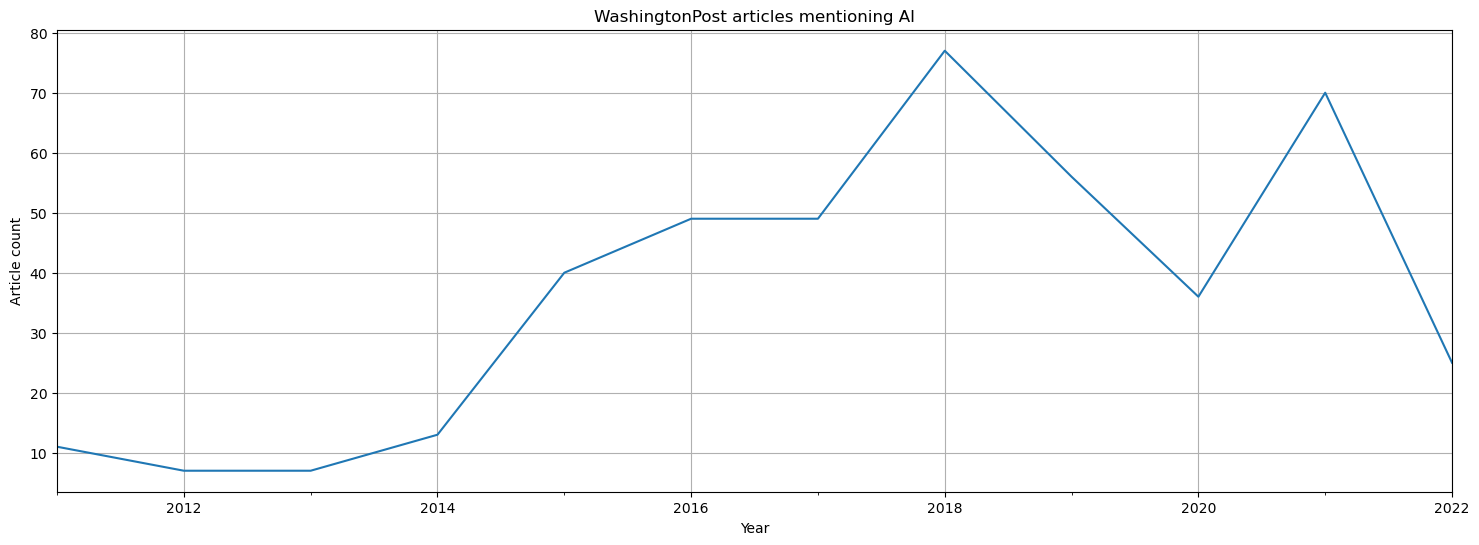

In [7]:
# Per outlet - WashingtonPost
df_wp = news_df.loc[news_df['outlet'] == 'WashingtonPost']
df_wp.shape

# Create a graph over the years
articlesWp = df_wp.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesWp.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('WashingtonPost articles mentioning AI')
plt.grid(True)

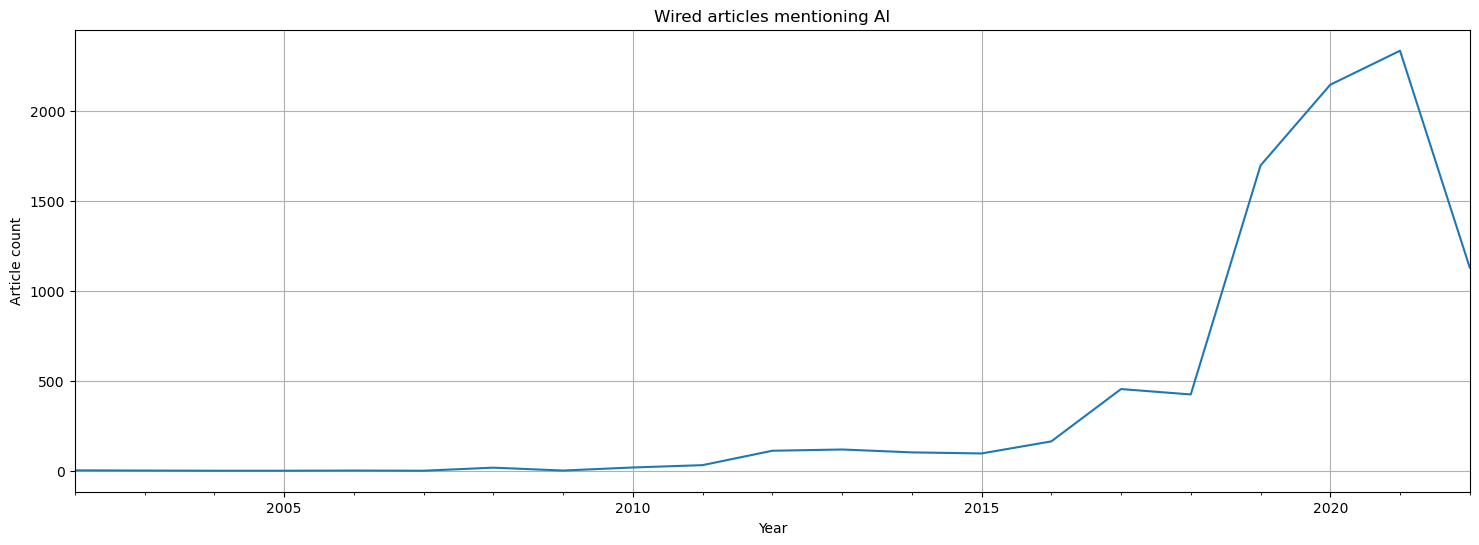

In [8]:
# Per outlet - Wired
df_wired = news_df.loc[news_df['outlet'] == 'Wired']
df_wired.shape

# Create a graph over the years
articlesWired = df_wired.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesWired.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('Wired articles mentioning AI')
plt.grid(True)

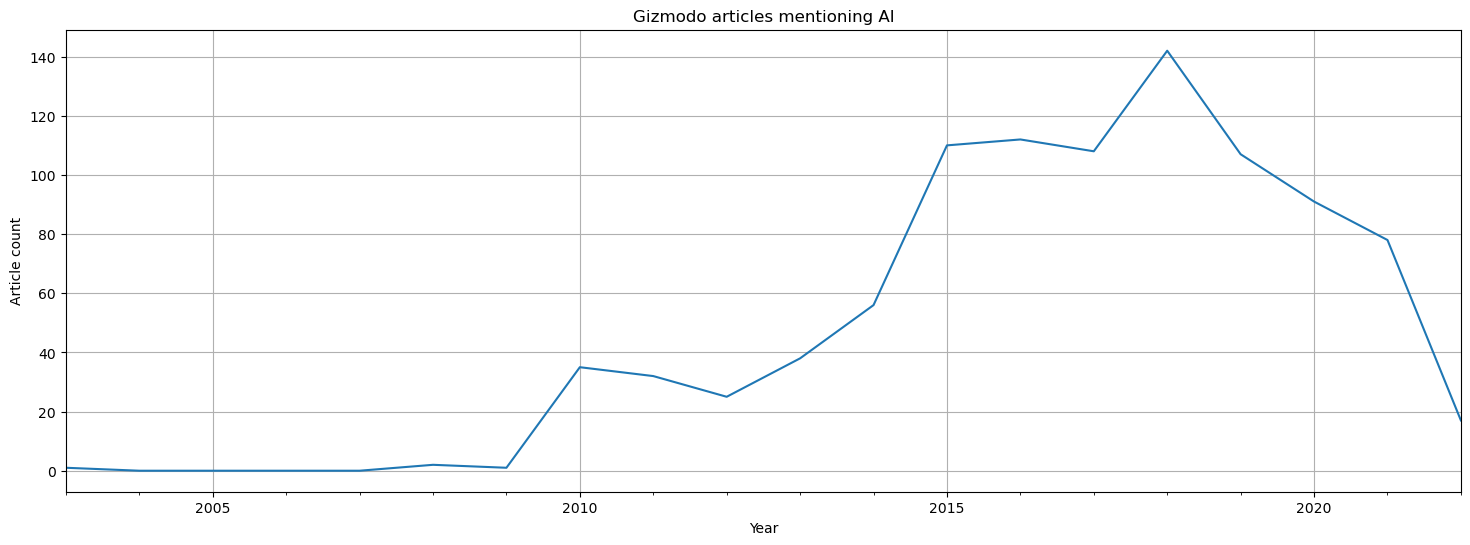

In [9]:
# Per outlet - Gizmodo
df_giz = news_df.loc[news_df['outlet'] == 'Gizmodo']
df_giz.shape

# Create a graph over the years
articlesGiz = df_giz.groupby(pd.Grouper(key='datetime', freq='Y', convention='start')).size()
articlesGiz.plot(figsize=(18,6))
plt.ylabel('Article count')
plt.xlabel('Year')
plt.title('Gizmodo articles mentioning AI')
plt.grid(True)

# LDA per outlet

In [10]:
#select specific outlet (WashingtonPost/NYT/Guardian/Gizmodo/Wired) for which to do the analysis
df = newsdata.loc[newsdata['outlet'] == 'WashingtonPost']
df

,Unnamed: 0,filename,outlet,title,description,datetime,body,category
13568,13568,news-the-switch-wp-2018-02-19-google-used-arti...,WashingtonPost,"In our eyes, Google’s software sees heart atta...",The new approach could one day allow people to...,2018-02-19 16:00:03.000,"By looking at the human eye, Google’s algorith...",NaN
13569,13569,opinions-silicon-valley-should-work-with-the-m...,WashingtonPost,Silicon Valley should work with the military o...,If the best minds refuse to contribute to the ...,2018-09-12 23:16:27.000,GOOGLE DECIDED after an employee backlash this...,NaN
13570,13570,news-the-switch-wp-2015-01-28-bill-gates-on-da...,WashingtonPost,Bill Gates on dangers of artificial intelligen...,Joining the likes of Stephen Hawking and Elon ...,2015-01-29 18:13:55.000,Bill Gates is a passionate technology advocate...,NaN
13571,13571,news-innovations-wp-2017-08-15-it-knew-what-yo...,WashingtonPost,‘It knew what you were going to do next’: AI l...,It only took the bot a few weeks to go from no...,2017-08-15 13:32:13.000,"For decades, the world’s smartest game-playing...",NaN
13572,13572,news-worldviews-wp-2012-10-24-ai-weiweis-odd-g...,WashingtonPost,Ai Weiwei’s odd ‘Gangnam Style’ parody,The Chinese dissident artist at his most and l...,2012-10-24 18:54:05.000,No matter how high his international stature r...,NaN
...,...,...,...,...,...,...,...,...
14003,14003,business-2019-02-21-john-delaneys-agenda-natio...,WashingtonPost,John Delaney’s 2020 agenda: National service f...,A policy guide to the Maryland Democrat runnin...,2019-02-21 15:36:56.334,Former congressman John Delaney (D-Md.) is run...,NaN
14004,14004,health-2022-02-28-ai-food-disruption-.html,WashingtonPost,AI and the future of our food,No description found,2022-02-28 14:00:35.735,Robots. Drones. Artificial Intelligence. All...,NaN
14005,14005,news-innovations-wp-2015-07-01-what-the-debacl...,WashingtonPost,What the debacle of climate change can teach u...,We didn't care about climate change until it w...,2015-07-01 13:32:40.000,Could artificial intelligence be the new clima...,NaN
14006,14006,technology-2021-09-24-autonomous-ai-ship-.html,WashingtonPost,After IBM failed to sail an autonomous boat ac...,Four centuries after the Mayflower reached Ame...,2021-09-24 11:00:31.504,After failing its first attempt to re-create t...,NaN


# Preprocessing

In [11]:
#Convert the body into strings
df['body'] = df['body'].astype(str)

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\4225837744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].astype(str)


In [12]:
#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc
    
#Create new column with words separated
df['text_nlp'] = df['body'].apply(lambda x: do_nlp(x))
df.head()

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\3066739096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_nlp'] = df['body'].apply(lambda x: do_nlp(x))


,Unnamed: 0,filename,outlet,title,description,datetime,body,category,text_nlp
13568,13568,news-the-switch-wp-2018-02-19-google-used-arti...,WashingtonPost,"In our eyes, Google’s software sees heart atta...",The new approach could one day allow people to...,2018-02-19 16:00:03.000,"By looking at the human eye, Google’s algorith...",NaN,"(By, looking, at, the, human, eye, ,, Google, ..."
13569,13569,opinions-silicon-valley-should-work-with-the-m...,WashingtonPost,Silicon Valley should work with the military o...,If the best minds refuse to contribute to the ...,2018-09-12 23:16:27.000,GOOGLE DECIDED after an employee backlash this...,NaN,"(GOOGLE, DECIDED, after, an, employee, backlas..."
13570,13570,news-the-switch-wp-2015-01-28-bill-gates-on-da...,WashingtonPost,Bill Gates on dangers of artificial intelligen...,Joining the likes of Stephen Hawking and Elon ...,2015-01-29 18:13:55.000,Bill Gates is a passionate technology advocate...,NaN,"(Bill, Gates, is, a, passionate, technology, a..."
13571,13571,news-innovations-wp-2017-08-15-it-knew-what-yo...,WashingtonPost,‘It knew what you were going to do next’: AI l...,It only took the bot a few weeks to go from no...,2017-08-15 13:32:13.000,"For decades, the world’s smartest game-playing...",NaN,"(For, decades, ,, the, world, ’s, smartest, ga..."
13572,13572,news-worldviews-wp-2012-10-24-ai-weiweis-odd-g...,WashingtonPost,Ai Weiwei’s odd ‘Gangnam Style’ parody,The Chinese dissident artist at his most and l...,2012-10-24 18:54:05.000,No matter how high his international stature r...,NaN,"(No, matter, how, high, his, international, st..."


In [13]:
#Function to include text "features" (https://spacy.io/usage/linguistic-features)
def include_features(x):
    include_features = ['VERB', 'PROPN', 'NOUN', 'ADJ']
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])   
    return text

#Create new column with features separated
df['features'] = df['text_nlp'].apply(lambda x: include_features(x))

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\2541454858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = df['text_nlp'].apply(lambda x: include_features(x))


In [14]:
#Function for data cleaning
def clean_text(x):
    x = x.lower()
    re.sub(r'http\S+', '',x) #remove URLs
    x = x.translate(str.maketrans('', '', string.punctuation)) #for punctuations removal
    # tokenize
    x = nltk.word_tokenize(x) 
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x

#Remove stopwords
stop_words = stopwords.words('english')
new_sw = ['ai', 'artificial intelligence', 'artificial', 'intelligence', 'technology', 'said', 'year', 'people', 'time', 'tech', 'mr', 'dr', 'think', 'know', 'want', 'create', 'say', 'going', 'human', 'woman', 'man', 'washington post', 'nyt', 'washington', 'post', 'guardian', 'gizmodo', 'wired']
stop_words.extend(new_sw)

#Update features column by cleaning text
df['features'] = df['features'].apply(lambda x: clean_text(x))

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\1326167967.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = df['features'].apply(lambda x: clean_text(x))


# LDA 1

In [15]:
# Get coherence scores to determine the amount of topics
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary, MmCorpus

# convert the text to a list of lists where each inner list contains a preprocessed sentence
data = df["features"].apply(lambda x: x.split()).tolist()

# Create a dictionary from the data
dictionary = Dictionary(data)

# Create a corpus
corpus = [dictionary.doc2bow(doc) for doc in data]

# Create a list to store the coherence scores
coherence_scores = []

# Loop through different numbers of topics
for num_topics in range(2, 15):
    # Create the LDA model
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    # Create the coherence model
    coherence_model = CoherenceModel(model=model, texts=data, dictionary=dictionary, coherence='c_v')
    # Append the coherence score to the list
    coherence_scores.append(coherence_model.get_coherence())

# Print the coherence scores
print(coherence_scores)

[0.2871888985796881, 0.2939082475216504, 0.2882553161999817, 0.2794029116319943, 0.28920026913731406, 0.27947655899611507, 0.28038494994431595, 0.2941025504323899, 0.2773057928865289, 0.2958071017392974, 0.2837874739672425, 0.27916204796922506, 0.2874795203705709]


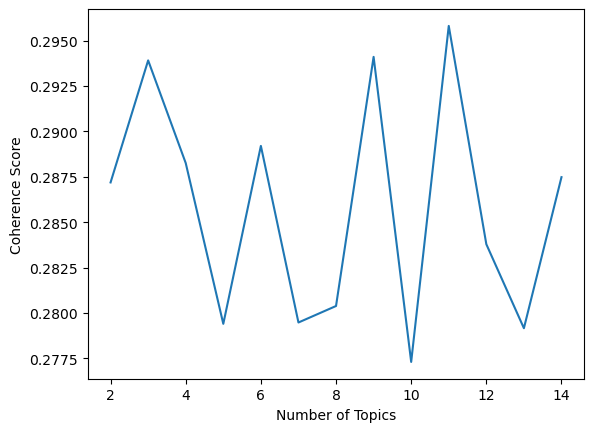

In [16]:
import matplotlib.pyplot as plt

# Create a list of the number of topics
num_topics = range(2, 15)

# Plot the coherence scores
plt.plot(num_topics, coherence_scores)

# Add labels to the plot
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

# Show the plot
plt.show()

In [17]:
# find the best number of topics
best_num_topics = coherence_scores.index(max(coherence_scores)) + 2
best_num_topics

11

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.4, min_df=20, stop_words='english')

In [19]:
dtm = cv.fit_transform(df['features'])

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
# for number of topics, see coherence
LDA = LatentDirichletAllocation(n_components=best_num_topics,random_state=42)

In [21]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=11, random_state=42)

In [22]:
single_topic = LDA.components_[0]
top_10_words = single_topic.argsort()[-10:]

In [23]:
for index in top_10_words:
    print(cv.get_feature_names()[index])

science
question
risk
future
learning
research
algorithm
human
researcher
google


C:\Users\celes\anaconda3\envs\ADS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
# print top 10 words per topic
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['science', 'question', 'risk', 'future', 'learning', 'research', 'algorithm', 'human', 'researcher', 'google']


THE TOP 10 WORDS FOR TOPIC #1
['privacy', 'including', 'software', 'surveillance', 'face', 'school', 'law', 'police', 'recognition', 'facial']


THE TOP 10 WORDS FOR TOPIC #2
['musk', 'better', 'percent', 'neural', 'google', 'photo', 'network', 'artist', 'art', 'image']


THE TOP 10 WORDS FOR TOPIC #3
['trump', 'policy', 'political', 'content', 'news', 'fake', 'social', 'medium', 'video', 'facebook']


THE TOP 10 WORDS FOR TOPIC #4
['real', 'activist', 'leader', 'friday', 'future', 'global', 'protest', 'country', 'change', 'climate']


THE TOP 10 WORDS FOR TOPIC #5
['national', 'defense', 'security', 'official', 'country', 'government', 'united', 'chinese', 'military', 'china']


THE TOP 10 WORDS FOR TOPIC #6
['service', 'say', 'robot', 'camera', 'assistant', 'home', 'device', 'google', 'voice', 'amazon']


THE TOP 10 WORDS FOR TOPIC #7
['today

### Add the topics to the dataframe

In [25]:
topic_results = LDA.transform(dtm)
print(topic_results.shape)
print(topic_results[0])

(440, 11)
[7.01113006e-01 5.87731500e-02 8.89062983e-02 3.55146028e-04
 3.55146026e-04 3.55144544e-04 3.55161189e-04 3.55142198e-04
 3.55150093e-04 1.43741301e-02 1.34702525e-01]


In [26]:
#probability of the article falling in to the topic with respect to the index of the value
topic_results[0].round(2)

array([0.7 , 0.06, 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.13])

In [27]:
df['topicLDA1'] = topic_results.argmax(axis=1)
df

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\3297816761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topicLDA1'] = topic_results.argmax(axis=1)


,Unnamed: 0,filename,outlet,title,description,datetime,body,category,text_nlp,features,topicLDA1
13568,13568,news-the-switch-wp-2018-02-19-google-used-arti...,WashingtonPost,"In our eyes, Google’s software sees heart atta...",The new approach could one day allow people to...,2018-02-19 16:00:03.000,"By looking at the human eye, Google’s algorith...",NaN,"(By, looking, at, the, human, eye, ,, Google, ...",looking eye google algorithm able predict high...,0
13569,13569,opinions-silicon-valley-should-work-with-the-m...,WashingtonPost,Silicon Valley should work with the military o...,If the best minds refuse to contribute to the ...,2018-09-12 23:16:27.000,GOOGLE DECIDED after an employee backlash this...,NaN,"(GOOGLE, DECIDED, after, an, employee, backlas...",google decided employee backlash summer wanted...,5
13570,13570,news-the-switch-wp-2015-01-28-bill-gates-on-da...,WashingtonPost,Bill Gates on dangers of artificial intelligen...,Joining the likes of Stephen Hawking and Elon ...,2015-01-29 18:13:55.000,Bill Gates is a passionate technology advocate...,NaN,"(Bill, Gates, is, a, passionate, technology, a...",bill gate passionate advocate big surprise pre...,0
13571,13571,news-innovations-wp-2017-08-15-it-knew-what-yo...,WashingtonPost,‘It knew what you were going to do next’: AI l...,It only took the bot a few weeks to go from no...,2017-08-15 13:32:13.000,"For decades, the world’s smartest game-playing...",NaN,"(For, decades, ,, the, world, ’s, smartest, ga...",decade world smartest game playing human racki...,7
13572,13572,news-worldviews-wp-2012-10-24-ai-weiweis-odd-g...,WashingtonPost,Ai Weiwei’s odd ‘Gangnam Style’ parody,The Chinese dissident artist at his most and l...,2012-10-24 18:54:05.000,No matter how high his international stature r...,NaN,"(No, matter, how, high, his, international, st...",high international stature rise chinese dissid...,3
...,...,...,...,...,...,...,...,...,...,...,...
14003,14003,business-2019-02-21-john-delaneys-agenda-natio...,WashingtonPost,John Delaney’s 2020 agenda: National service f...,A policy guide to the Maryland Democrat runnin...,2019-02-21 15:36:56.334,Former congressman John Delaney (D-Md.) is run...,NaN,"(Former, congressman, John, Delaney, (, D, -, ...",former congressman john delaney md running pre...,5
14004,14004,health-2022-02-28-ai-food-disruption-.html,WashingtonPost,AI and the future of our food,No description found,2022-02-28 14:00:35.735,Robots. Drones. Artificial Intelligence. All...,NaN,"( , Robots, ., Drones, ., Artificial, Intelli...",robot drone touted potential savior farmer dep...,0
14005,14005,news-innovations-wp-2015-07-01-what-the-debacl...,WashingtonPost,What the debacle of climate change can teach u...,We didn't care about climate change until it w...,2015-07-01 13:32:40.000,Could artificial intelligence be the new clima...,NaN,"(Could, artificial, intelligence, be, the, new...",new climate change dangerous threat overlook l...,0
14006,14006,technology-2021-09-24-autonomous-ai-ship-.html,WashingtonPost,After IBM failed to sail an autonomous boat ac...,Four centuries after the Mayflower reached Ame...,2021-09-24 11:00:31.504,After failing its first attempt to re-create t...,NaN,"(After, failing, its, first, attempt, to, re, ...",failing first attempt mayflower voyage atlanti...,0


# LDA 2

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics -> same as LDA 1
n_topics = best_num_topics

# Convert the text to a bag of words representation
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['features'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)
lda.fit(cv_matrix)

# Print the topics
topics = lda.components_
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {' '.join([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])}")

C:\Users\celes\anaconda3\envs\ADS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: thunberg cow country summit voice tire world change glasgow climate
Topic 2: black officer percent federal sentence protest school recognition facial police
Topic 3: new ukrainian camera ukraine russian company home device google amazon
Topic 4: future robot make new world human musk game machine computer
Topic 5: chinese security united government data new state china system company
Topic 6: machine world medium child social system weapon data facebook company
Topic 7: student care data work make get thing way need cancer
Topic 8: network video social data chinese machine gebru china company google
Topic 9: make world researcher machine new system work company data google
Topic 10: data new tesla driver customer clearview driving vehicle car company
Topic 11: state machine data make research company content new health video


In [29]:
# Get topic probabilities for each document
topic_probabilities = lda.transform(cv_matrix)

# Assign the topic with the highest probability to each document
df['topicLDA2'] = topic_probabilities.argmax(axis=1)
df

C:\Users\celes\AppData\Local\Temp\ipykernel_38088\2525859168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topicLDA2'] = topic_probabilities.argmax(axis=1)


,Unnamed: 0,filename,outlet,title,description,datetime,body,category,text_nlp,features,topicLDA1,topicLDA2
13568,13568,news-the-switch-wp-2018-02-19-google-used-arti...,WashingtonPost,"In our eyes, Google’s software sees heart atta...",The new approach could one day allow people to...,2018-02-19 16:00:03.000,"By looking at the human eye, Google’s algorith...",NaN,"(By, looking, at, the, human, eye, ,, Google, ...",looking eye google algorithm able predict high...,0,8
13569,13569,opinions-silicon-valley-should-work-with-the-m...,WashingtonPost,Silicon Valley should work with the military o...,If the best minds refuse to contribute to the ...,2018-09-12 23:16:27.000,GOOGLE DECIDED after an employee backlash this...,NaN,"(GOOGLE, DECIDED, after, an, employee, backlas...",google decided employee backlash summer wanted...,5,4
13570,13570,news-the-switch-wp-2015-01-28-bill-gates-on-da...,WashingtonPost,Bill Gates on dangers of artificial intelligen...,Joining the likes of Stephen Hawking and Elon ...,2015-01-29 18:13:55.000,Bill Gates is a passionate technology advocate...,NaN,"(Bill, Gates, is, a, passionate, technology, a...",bill gate passionate advocate big surprise pre...,0,3
13571,13571,news-innovations-wp-2017-08-15-it-knew-what-yo...,WashingtonPost,‘It knew what you were going to do next’: AI l...,It only took the bot a few weeks to go from no...,2017-08-15 13:32:13.000,"For decades, the world’s smartest game-playing...",NaN,"(For, decades, ,, the, world, ’s, smartest, ga...",decade world smartest game playing human racki...,7,3
13572,13572,news-worldviews-wp-2012-10-24-ai-weiweis-odd-g...,WashingtonPost,Ai Weiwei’s odd ‘Gangnam Style’ parody,The Chinese dissident artist at his most and l...,2012-10-24 18:54:05.000,No matter how high his international stature r...,NaN,"(No, matter, how, high, his, international, st...",high international stature rise chinese dissid...,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...
14003,14003,business-2019-02-21-john-delaneys-agenda-natio...,WashingtonPost,John Delaney’s 2020 agenda: National service f...,A policy guide to the Maryland Democrat runnin...,2019-02-21 15:36:56.334,Former congressman John Delaney (D-Md.) is run...,NaN,"(Former, congressman, John, Delaney, (, D, -, ...",former congressman john delaney md running pre...,5,6
14004,14004,health-2022-02-28-ai-food-disruption-.html,WashingtonPost,AI and the future of our food,No description found,2022-02-28 14:00:35.735,Robots. Drones. Artificial Intelligence. All...,NaN,"( , Robots, ., Drones, ., Artificial, Intelli...",robot drone touted potential savior farmer dep...,0,5
14005,14005,news-innovations-wp-2015-07-01-what-the-debacl...,WashingtonPost,What the debacle of climate change can teach u...,We didn't care about climate change until it w...,2015-07-01 13:32:40.000,Could artificial intelligence be the new clima...,NaN,"(Could, artificial, intelligence, be, the, new...",new climate change dangerous threat overlook l...,0,3
14006,14006,technology-2021-09-24-autonomous-ai-ship-.html,WashingtonPost,After IBM failed to sail an autonomous boat ac...,Four centuries after the Mayflower reached Ame...,2021-09-24 11:00:31.504,After failing its first attempt to re-create t...,NaN,"(After, failing, its, first, attempt, to, re, ...",failing first attempt mayflower voyage atlanti...,0,5
